In [148]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display, clear_output

from utils import *

%matplotlib inline

In [150]:
im = cv2.imread('test_images/test5.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

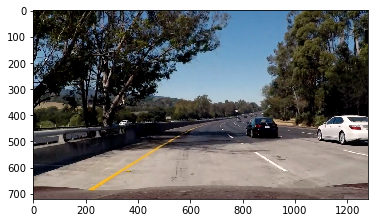

In [151]:
plt.imshow(im)

In [46]:
# s2 = cv2.adaptiveThreshold(s , 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 401, 10);

In [152]:
image = im

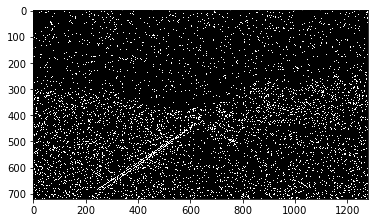

In [48]:
grad_thresh = threshold_image(image, ksize=9)

In [19]:
def process(sobel_kernel, sobel_x_thresh_min, sobel_x_thresh_max,
            sobel_y_thresh_min, sobel_y_thresh_max, mag_kernel, mag_thresh_min, mag_thresh_max, 
            dir_kernel, dir_thresh_min, dir_thresh_max, sat_thresh_min, sat_thresh_max):
    gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=sobel_kernel, thresh=(sobel_x_thresh_min, sobel_x_thresh_max))
    grady = abs_sobel_thresh(image, orient='y', sobel_kernel=sobel_kernel, thresh=(sobel_y_thresh_min, sobel_y_thresh_max))
    mag_binary = mag_thresh(image, sobel_kernel=mag_kernel, mag_thresh=(mag_thresh_min, mag_thresh_max))
    dir_binary = dir_threshold(image, sobel_kernel=dir_kernel, thresh=(dir_thresh_min, dir_thresh_max))

    gradient_threshold = np.zeros_like(dir_binary)
    gradient_threshold[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
    
    image_hsl = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    s_channel = image_hsl[:, :, 2]
    color_threshold = np.zeros_like(s_channel)
    color_threshold[(s_channel >= sat_thresh_min) & (s_channel <= sat_thresh_max)] = 1

    binary = np.zeros_like(gradient_threshold)
    binary[(color_threshold == 1) | (gradient_threshold == 1)] = 1

    ax.clear()
    ax.imshow(binary, cmap='gray')

<function __main__.process>

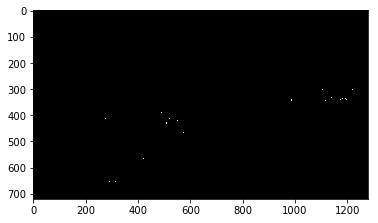

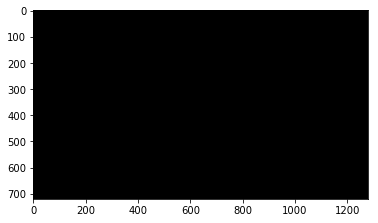

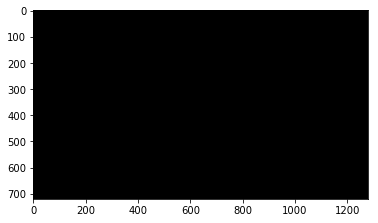

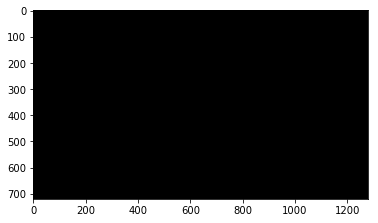

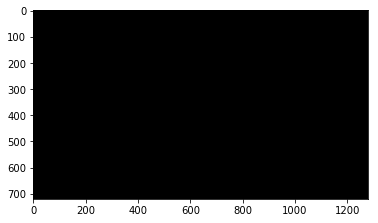

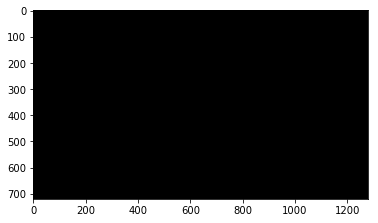

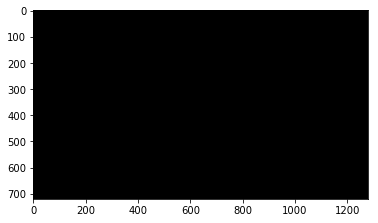

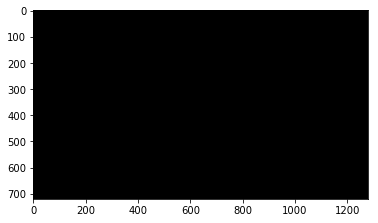

In [24]:
# interactive_plot = 
fig, ax = plt.subplots()

interact(process, sobel_kernel=widgets.IntSlider(min=1,max=15,step=2,value=3), 
                               sobel_x_thresh_min = (1, 255), sobel_x_thresh_max=(1, 255),
                               sobel_y_thresh_min = (1,255), sobel_y_thresh_max = (1,255), 
                               mag_kernel = widgets.IntSlider(min=1,max=15,step=2,value=3),
                               mag_thresh_min = (1,255), mag_thresh_max = (1,255), 
                               dir_kernel = widgets.IntSlider(min=1,max=15,step=2,value=3), 
                               dir_thresh_min = (1,255), dir_thresh_max=(1,255), sat_thresh_min=(1,255), sat_thresh_max=(1,255))

#output = interactive_plot.children[-1]
#output.layout.height = '350px'
# interactive_plot

In [35]:
def f(x, y, z):
    gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=x, thresh=(1, 255))
    ax.clear()
    ax.imshow(gradx, cmap='gray')
    display(fig)
    # return gradx

In [36]:
fig, ax = plt.subplots()
plt.close(fig)

In [ ]:
mySlider.observe(on_slider_change, names='value')

In [37]:

interact(f, x=widgets.IntSlider(min=1,max=15,step=2,value=3),
        y=widgets.IntSlider(min=1,max=255,step=2,value=3),
        z=widgets.IntSlider(min=1,max=255,step=2,value=3))

<function __main__.f>

In [2]:
warped = mpimg.imread('binary_warped.jpg')

In [25]:
warped = warped[:,:,0]

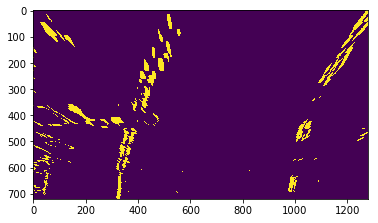

In [74]:
plt.imshow(warped)

In [75]:
# window settings
window_width = 50 
window_height = 80 # Break image into 9 vertical layers since image height is 720
margin = 100 # How much to slide left and right for searching

In [76]:
window_centroids = []

In [77]:
window = np.ones(window_width)

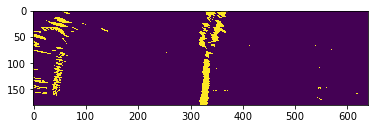

In [78]:
plt.imshow(warped[int(3*warped.shape[0]/4):,:int(warped.shape[1]/2)])

In [79]:
l_sum = np.sum(warped[int(3*warped.shape[0]/4):,:int(warped.shape[1]/2)], axis=0)

In [80]:
l_sum.shape

(640,)

In [82]:
l_center = np.argmax(np.convolve(window, l_sum)) - window_width/2

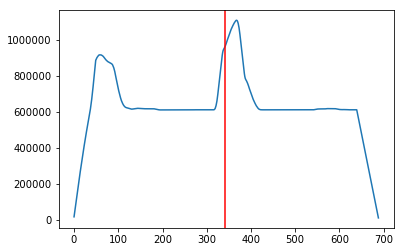

In [84]:
plt.plot(np.convolve(window, l_sum))
plt.axvline(x = l_center, color='red')

In [85]:
r_sum = np.sum(warped[int(3*warped.shape[0]/4):,int(warped.shape[1]/2):], axis=0)

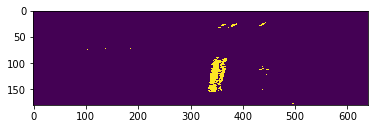

In [86]:
plt.imshow(warped[int(3*warped.shape[0]/4):,int(warped.shape[1]/2):])

In [87]:
r_center = np.argmax(np.convolve(window, r_sum)) - window_width/2 + int(warped.shape[1]/2)

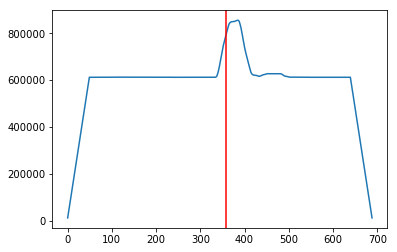

In [92]:
plt.plot(np.convolve(window, r_sum))
plt.axvline(x=r_center - int(warped.shape[1]/2), color='red')

In [93]:
window_centroids = [(l_center, r_center)]

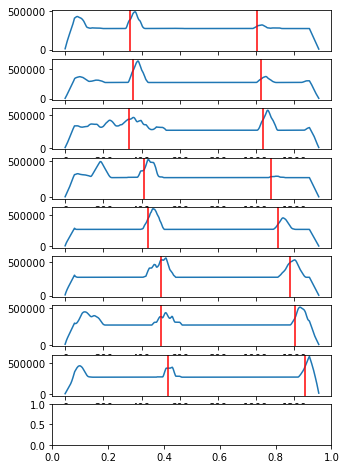

In [94]:
fig, ax = plt.subplots(nrows=int(warped.shape[0]/window_height),ncols=1)
fig.set_size_inches(5, 8)
for level in range(1, int(warped.shape[0]/window_height)):
    image_layer = np.sum(warped[int(warped.shape[0]-(level+1)*window_height):int(warped.shape[0]-level*window_height),:], 
                         axis=0)
    conv_signal = np.convolve(window, image_layer)
    
    offset = window_width / 2
    l_min_index = int(max(l_center - offset - margin, 0))
    l_max_index = int(min(l_center + offset + margin, warped.shape[1]))
    l_center = np.argmax(conv_signal[l_min_index:l_max_index]) + l_min_index - offset
    
    r_min_index = int(max(r_center - offset - margin, 0))
    r_max_index = int(min(r_center + offset + margin, warped.shape[1]))
    r_center = np.argmax(conv_signal[r_min_index:r_max_index]) + r_min_index - offset
    
    window_centroids.append((l_center, r_center))

    ax[level-1].plot(conv_signal)
    ax[level-1].axvline(x=l_center, color='red')
    ax[level-1].axvline(x=r_center, color='red')

In [95]:
def window_mask(width, height, img_ref, center,level):
    output = np.zeros_like(img_ref)
    output[int(img_ref.shape[0]-(level+1)*height):int(img_ref.shape[0]-level*height),max(0,int(center-width/2)):min(int(center+width/2),img_ref.shape[1])] = 1
    return output

In [100]:
l_points = np.zeros_like(warped)
r_points = np.zeros_like(warped)

for level in range(0, len(window_centroids)):
    l_mask = window_mask(window_width, window_height, warped, window_centroids[level][0], level)
    r_mask = window_mask(window_width, window_height, warped, window_centroids[level][1], level)
    
    # Add graphic points from window mask here to total pixels found 
    l_points[(l_points == 255) | ((l_mask == 1) ) ] = 255
    r_points[(r_points == 255) | ((r_mask == 1) ) ] = 255
    
# Draw the results
template = np.array(r_points+l_points,np.uint8) # add both left and right window pixels together
zero_channel = np.zeros_like(template) # create a zero color channel
template = np.array(cv2.merge((zero_channel,template,zero_channel)),np.uint8) # make window pixels green
warpage= np.dstack((warped, warped, warped)) # making the original road pixels 3 color channels
output = cv2.addWeighted(warpage, 1, template, 0.5, 0.0) # overlay the orignal road image with window results


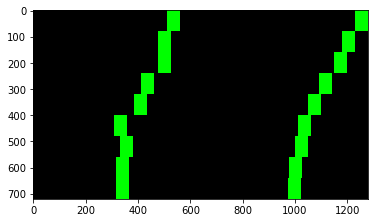

In [101]:
plt.imshow(template)

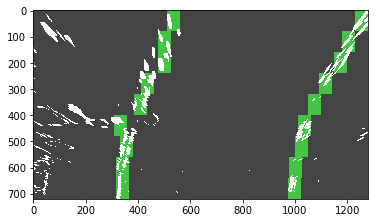

In [102]:
plt.imshow(output)

In [153]:
nonzero = l_points.nonzero()
nonzero_y = np.array(nonzero[0])
nonzero_x = np.array(nonzero[1])

In [154]:
left_fit = np.polyfit(nonzero_y, nonzero_x, 2)

In [155]:
nonzero = r_points.nonzero()
nonzero_y = np.array(nonzero[0])
nonzero_x = np.array(nonzero[1])

In [156]:
right_fit = np.polyfit(nonzero_y, nonzero_x, 2)

In [157]:
ploty = np.linspace(0, warped.shape[0]-1, warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

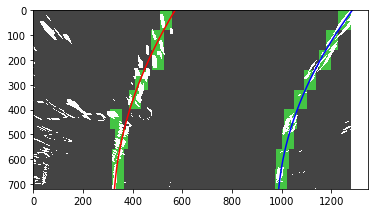

In [158]:
fig, ax = plt.subplots( nrows=1, ncols=1 )
ax.imshow(output)
ax.plot(left_fitx, ploty, color='red')
ax.plot(right_fitx, ploty, color='blue')

In [143]:
# Define y-value where we want radius of curvature
# I'll choose the maximum y-value, corresponding to the bottom of the image
y_eval = np.max(ploty)
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
print(left_curverad, right_curverad)

1373.128219101019 1139.0080483037395


In [146]:
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/warped.shape[0] # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix, 2)
right_fit_cr = np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix, 2)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')
# Example values: 632.1 m    626.2 m

447.2647444748354 m 447.2647444748354 m
